In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
with open("../data/interim/02_extracted_basic_numerical_comparison.pkl", "rb") as f:
    wiki_df = pickle.load(f)

Get only the numerical data for plotting

In [83]:
wiki_df.head()

,parent_title,parent_url,child_title,child_url,comparison,parent_extract,parent_links,parent_linkshere,parent_categories,parent_redirects,...,child_linkshere,child_categories,child_redirects,parent_direct_to_child,child_direct_to_parent,parent_path_to_child,child_path_to_parent,shared_categories,shared_links,shared_linkshere
0,Division_by_Zero_(story),https://en.wikipedia.org/wiki/Division_by_Zero...,Division_by_zero,https://en.wikipedia.org/wiki/Division_by_zero,Division_by_Zero_(story)|Division_by_zero,Division by Zero is a science fiction short st...,"[Amazon.com, Anthology, Bantam Spectra, Consis...","[Division by zero (disambiguation), Stories of...","[Category:1991 short stories, Category:Science...",[],...,"[Divide by 0 Error, Division By Zero, Extended...","[Category:0 (number), Category:Computer arithm...","[Divide by zero, One over Zero, One Over Zero,...",1,1,1,2,0,2,1
1,Indeterminate_form,https://en.wikipedia.org/wiki/Indeterminate_form,Division_by_zero,https://en.wikipedia.org/wiki/Division_by_zero,Division_by_zero|Indeterminate_form,In calculus and other branches of mathematical...,"[Analytic function, Calculus, Cardinal number,...","[Exponentiation, Indeterminate expression, L'H...",[Category:Limits (mathematics)],"[0/0, Zero divided by zero, 0 divided by 0, In...",...,"[Divide by 0 Error, Division By Zero, Extended...","[Category:0 (number), Category:Computer arithm...","[Divide by zero, One over Zero, One Over Zero,...",1,1,6,9,0,10,10
2,0,https://en.wikipedia.org/wiki/0,Division_by_zero,https://en.wikipedia.org/wiki/Division_by_zero,0|Division_by_zero,0 (zero) is both a number and the numerical di...,"[-1 (number), 0 (disambiguation), 0 (number), ...","[7000 (number), 19 (number), 178 (number), EBC...","[Category:0 (number), Category:Elementary arit...","[Number 0, Nought, Zeroes, Zero (mathematics),...",...,"[Divide by 0 Error, Division By Zero, Extended...","[Category:0 (number), Category:Computer arithm...","[Divide by zero, One over Zero, One Over Zero,...",1,0,8,2,1,21,2
3,Division_by_Zero_(story),https://en.wikipedia.org/wiki/Division_by_Zero...,Infinity,https://en.wikipedia.org/wiki/Infinity,Division_by_Zero_(story)|Infinity,Division by Zero is a science fiction short st...,"[Amazon.com, Anthology, Bantam Spectra, Consis...","[Division by zero (disambiguation), Stories of...","[Category:1991 short stories, Category:Science...",[],...,"[Iterated binary operation, Bill Childers, Chr...","[Category:CS1: long volume value, Category:Con...","[The Infinite, Infinitely, Infinate, InFINity,...",1,0,2,1,0,1,1
4,Indeterminate_form,https://en.wikipedia.org/wiki/Indeterminate_form,Extended_real_number_line,https://en.wikipedia.org/wiki/Extended_real_nu...,Extended_real_number_line|Indeterminate_form,In calculus and other branches of mathematical...,"[Analytic function, Calculus, Cardinal number,...","[Exponentiation, Indeterminate expression, L'H...",[Category:Limits (mathematics)],"[0/0, Zero divided by zero, 0 divided by 0, In...",...,"[Number line, L'Hôpital's rule, 1,000,000,000,...","[Category:Infinity, Category:Real numbers]","[Extended real number, Extended reals, Extende...",1,1,8,6,0,10,11


In [114]:
# wiki_numerical_df = wiki_df[['parent_direct_to_child', 'child_direct_to_parent',
#        'parent_path_to_child', 'child_path_to_parent', 'shared_categories',
#        'shared_links', 'shared_linkshere']].copy()

wiki_numerical_df = wiki_df[['parent_path_to_child', 'child_path_to_parent', 'shared_categories',
       'shared_links', 'shared_linkshere']].copy()

# wiki_numerical_df = wiki_df[['parent_path_to_child', 'child_path_to_parent']].copy()

In [115]:
wiki_numerical_df.head()

,parent_path_to_child,child_path_to_parent,shared_categories,shared_links,shared_linkshere
0,1,2,0,2,1
1,6,9,0,10,10
2,8,2,1,21,2
3,2,1,0,1,1
4,8,6,0,10,11


## Scaling and clustering

In [116]:
# scaler = RobustScaler()
# scaler = StandardScaler()
scaler = Normalizer()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()


scaled = scaler.fit_transform(wiki_numerical_df)
scaled_df = pd.DataFrame(scaled, columns=wiki_numerical_df.columns)

In [117]:
kmeans = KMeans(n_clusters=2, n_jobs=-1)

kmeans.fit(scaled);
# scaled_df["clusters"] = kmeans.labels_

scaled_with_labels = scaled_df.copy()
scaled_with_labels['labels'] = kmeans.labels_

unscaled_with_labels = wiki_numerical_df.copy()
unscaled_with_labels['labels'] = kmeans.labels_

scaled_with_labels.head()

,parent_path_to_child,child_path_to_parent,shared_categories,shared_links,shared_linkshere,labels
0,0.316228,0.632456,0.000000,0.632456,0.316228,0
1,0.336994,0.505490,0.000000,0.561656,0.561656,1
2,0.352865,0.088216,0.044108,0.926270,0.088216,0
3,0.755929,0.377964,0.000000,0.377964,0.377964,1
4,0.446516,0.334887,0.000000,0.558146,0.613960,1


In [118]:
scaled_with_labels.labels.value_counts()

1    69454
0    65564
Name: labels, dtype: int64

In [41]:
silhouette_score(scaled, kmeans.labels_)

0.949428651375003

In [119]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
X = scaled_with_labels.drop("labels", axis=1)
y = scaled_with_labels.labels

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

rf.fit(X_train, y_train);

print("score:\t", rf.score(X_test, y_test))
print("Feature Importances:\t", list(zip(X.columns, rf.feature_importances_)))

score:	 0.9867180170838888
Feature Importances:	 [('parent_path_to_child', 0.04400415523388456), ('child_path_to_parent', 0.022534367527858323), ('shared_categories', 0.001179719773102136), ('shared_links', 0.3877289713952281), ('shared_linkshere', 0.5445527860699269)]


# PCA for graphing

In [120]:
pca = PCA(n_components=2)

transformed = pca.fit_transform(scaled_df)

In [121]:
np.cumsum(pca.explained_variance_)

array([0.12132849, 0.18568645])

In [122]:
transformed_scaled_df = pd.DataFrame(transformed, columns=["PC1", "PC2"])
transformed_scaled_df['clusters'] = kmeans.labels_
# transformed_scaled_df['child_direct_to_parent'] = wiki_numerical_df.child_direct_to_parent

In [123]:
transformed_scaled_df.head()

,PC1,PC2,clusters
0,-0.072975,0.224587,0
1,0.148077,0.123503,1
2,-0.459688,-0.242494,0
3,0.203459,-0.226207,1
4,0.197748,-0.075792,1


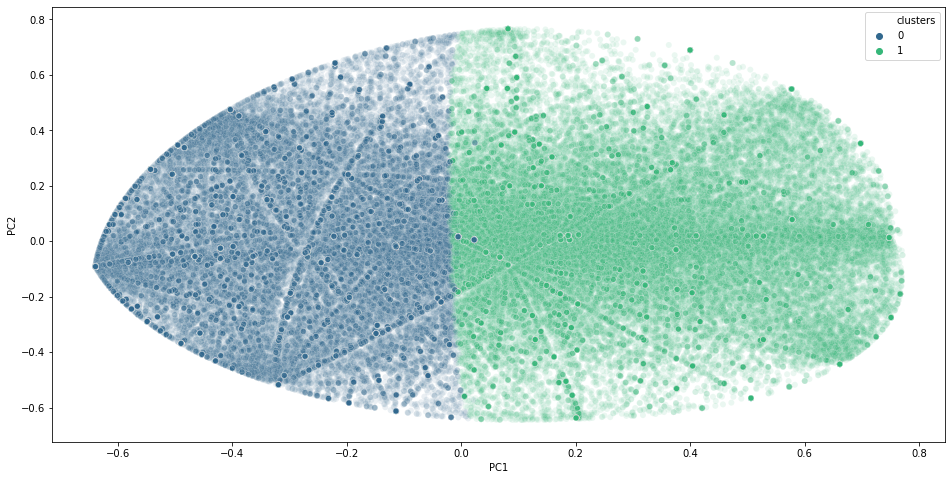

In [124]:
plt.figure(figsize=(16,8))
# sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1], hue=scaled_df.clusters)
# sns.scatterplot(x=transformed[:, 0], y=transformed[:, 1])
sns.scatterplot(data=transformed_scaled_df, x="PC1", y="PC2", hue="clusters", palette="viridis", alpha=0.1)
plt.show()

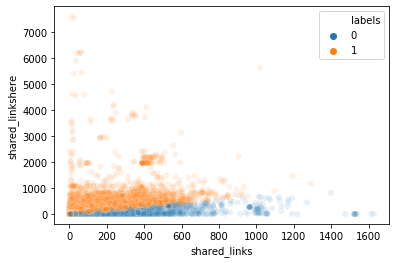

In [127]:
sns.scatterplot(data=unscaled_with_labels, x="shared_links", y="shared_linkshere", hue="labels", alpha=0.1)